In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import scipy.stats as stats

In [94]:
stats_features = [
         'PTS',
         'MIN',
         'FGM',
         'FGA',
         'FG3M',
         'FG3A',
         'FTM',
         'FTA',
         'FT_PCT',
         'OREB',
         'DREB',
         'AST',
         'STL',
         'TOV',
         'BLK',
         'PF',
         'PLUS_MINUS']

In [95]:
stats_targets = ['NBA_FANTASY_PTS']

In [96]:
# Read in per game data from csv folder
two_twenty = pd.read_csv('C:/Users/User/Desktop/Python/Projects/Nba Stats/leaguedashplayerstats_LeagueDashPlayerStats__PerMode-PerGame_LeagueID-00_Season-2019-20_SeasonType-Regular Season.csv', header = 0)

In [97]:
def important(stats):
    stats = stats[[
         'PLAYER_ID',
         'PTS',
         'MIN',
         'FGM',
         'FGA',
         'FG3M',
         'FG3A',
         'FTM',
         'FTA',
         'FT_PCT',
         'OREB',
         'DREB',
         'AST',
         'STL',
         'TOV',
         'BLK',
         'PF',
         'PLUS_MINUS',
         'NBA_FANTASY_PTS'
    ]]
    return stats

In [98]:
df = two_twenty

In [99]:
df = important(df)

In [100]:
df

,PLAYER_ID,PTS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,AST,STL,TOV,BLK,PF,PLUS_MINUS,NBA_FANTASY_PTS
0,203932,14.4,33.0,5.4,12.5,1.2,3.9,2.4,3.5,0.675,1.8,5.8,3.7,0.9,1.6,0.6,2.0,-1.7,31.9
1,1628988,9.4,23.6,3.5,8.6,1.4,3.5,1.1,1.2,0.861,0.4,1.9,3.3,0.8,1.3,0.2,1.8,1.5,18.8
2,1627846,6.0,15.8,2.1,4.6,0.8,2.2,1.0,1.3,0.774,0.3,1.6,0.7,0.4,0.8,0.4,1.4,-1.2,11.1
3,1629690,2.9,10.2,1.1,2.5,0.5,1.4,0.2,0.4,0.500,0.6,0.3,0.4,0.4,0.2,0.0,1.5,4.5,5.5
4,1629678,3.1,10.8,1.1,2.8,0.5,1.7,0.3,0.5,0.692,0.2,1.0,0.5,0.3,0.3,0.1,1.5,-1.3,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,203897,25.5,34.8,9.0,20.0,3.1,8.1,4.5,5.6,0.802,0.7,4.1,4.2,1.5,3.4,0.5,2.2,-3.2,40.0
510,1629668,2.0,8.2,0.6,2.4,0.6,1.6,0.2,0.2,1.000,0.0,1.2,0.6,0.4,0.6,0.0,0.8,-5.4,4.9
511,1629015,1.1,4.6,0.4,1.6,0.0,0.4,0.3,0.6,0.500,0.0,0.3,0.3,0.4,0.3,0.0,0.6,-1.4,2.9
512,1629627,23.6,29.7,9.1,15.4,0.3,0.7,5.2,8.0,0.645,2.9,3.9,2.2,0.8,2.7,0.5,1.7,6.3,36.2


In [101]:
df_cleaned = df.dropna()

In [102]:
df_cleaned = df_cleaned.set_index('PLAYER_ID')

In [103]:
df_cleaned

,PTS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,AST,STL,TOV,BLK,PF,PLUS_MINUS,NBA_FANTASY_PTS
PLAYER_ID,,,,,,,,,,,,,,,,,,
203932,14.4,33.0,5.4,12.5,1.2,3.9,2.4,3.5,0.675,1.8,5.8,3.7,0.9,1.6,0.6,2.0,-1.7,31.9
1628988,9.4,23.6,3.5,8.6,1.4,3.5,1.1,1.2,0.861,0.4,1.9,3.3,0.8,1.3,0.2,1.8,1.5,18.8
1627846,6.0,15.8,2.1,4.6,0.8,2.2,1.0,1.3,0.774,0.3,1.6,0.7,0.4,0.8,0.4,1.4,-1.2,11.1
1629690,2.9,10.2,1.1,2.5,0.5,1.4,0.2,0.4,0.500,0.6,0.3,0.4,0.4,0.2,0.0,1.5,4.5,5.5
1629678,3.1,10.8,1.1,2.8,0.5,1.7,0.3,0.5,0.692,0.2,1.0,0.5,0.3,0.3,0.1,1.5,-1.3,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203897,25.5,34.8,9.0,20.0,3.1,8.1,4.5,5.6,0.802,0.7,4.1,4.2,1.5,3.4,0.5,2.2,-3.2,40.0
1629668,2.0,8.2,0.6,2.4,0.6,1.6,0.2,0.2,1.000,0.0,1.2,0.6,0.4,0.6,0.0,0.8,-5.4,4.9
1629015,1.1,4.6,0.4,1.6,0.0,0.4,0.3,0.6,0.500,0.0,0.3,0.3,0.4,0.3,0.0,0.6,-1.4,2.9


In [104]:
x = df_cleaned[stats_features]

In [105]:
y = df_cleaned[stats_targets]

In [106]:
x

,PTS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,AST,STL,TOV,BLK,PF,PLUS_MINUS
PLAYER_ID,,,,,,,,,,,,,,,,,
203932,14.4,33.0,5.4,12.5,1.2,3.9,2.4,3.5,0.675,1.8,5.8,3.7,0.9,1.6,0.6,2.0,-1.7
1628988,9.4,23.6,3.5,8.6,1.4,3.5,1.1,1.2,0.861,0.4,1.9,3.3,0.8,1.3,0.2,1.8,1.5
1627846,6.0,15.8,2.1,4.6,0.8,2.2,1.0,1.3,0.774,0.3,1.6,0.7,0.4,0.8,0.4,1.4,-1.2
1629690,2.9,10.2,1.1,2.5,0.5,1.4,0.2,0.4,0.500,0.6,0.3,0.4,0.4,0.2,0.0,1.5,4.5
1629678,3.1,10.8,1.1,2.8,0.5,1.7,0.3,0.5,0.692,0.2,1.0,0.5,0.3,0.3,0.1,1.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203897,25.5,34.8,9.0,20.0,3.1,8.1,4.5,5.6,0.802,0.7,4.1,4.2,1.5,3.4,0.5,2.2,-3.2
1629668,2.0,8.2,0.6,2.4,0.6,1.6,0.2,0.2,1.000,0.0,1.2,0.6,0.4,0.6,0.0,0.8,-5.4
1629015,1.1,4.6,0.4,1.6,0.0,0.4,0.3,0.6,0.500,0.0,0.3,0.3,0.4,0.3,0.0,0.6,-1.4


In [107]:
y.head()

,NBA_FANTASY_PTS
PLAYER_ID,
203932,31.9
1628988,18.8
1627846,11.1
1629690,5.5
1629678,6.3


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=random.randint(1,300))

In [109]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_prediction = regressor.predict(x_test)

In [111]:
y_test.describe()

,NBA_FANTASY_PTS
count,155.000000
mean,16.515484
std,11.815503
min,0.200000
25%,7.650000
50%,15.300000
75%,22.550000
max,56.400000


In [112]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [113]:
print(RMSE)

0.14644545404522327


In [114]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [115]:
y_prediction = regressor.predict(x_test)

In [116]:
y_test.describe()

,NBA_FANTASY_PTS
count,155.000000
mean,16.515484
std,11.815503
min,0.200000
25%,7.650000
50%,15.300000
75%,22.550000
max,56.400000


In [117]:
y.describe()

,NBA_FANTASY_PTS
count,514.000000
mean,17.742607
std,11.605193
min,0.000000
25%,9.100000
50%,15.800000
75%,24.600000
max,57.300000


In [118]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [119]:
print(RMSE)

3.018715813270657


In [120]:
pts_prediction = pd.DataFrame(y_prediction)

In [121]:
pts_prediction.columns = ['NBA_FANTASY_PTS']

In [122]:
pts_prediction.describe()

,NBA_FANTASY_PTS
count,155.000000
mean,16.654839
std,11.724728
min,0.000000
25%,8.100000
50%,13.800000
75%,22.550000
max,57.300000


In [123]:
pts_prediction.max()

NBA_FANTASY_PTS    57.3
dtype: float64

In [124]:
y_test.max()

NBA_FANTASY_PTS    56.4
dtype: float64

In [125]:
y_test

,NBA_FANTASY_PTS
PLAYER_ID,
203935,30.1
202696,42.1
203992,25.3
1629027,47.6
203085,15.7
...,...
1629185,11.0
203501,23.7
202083,14.4


In [126]:
y_test.index

Int64Index([ 203935,  202696,  203992, 1629027,  203085, 1628430,  203482,
            1629216, 1626153,  202695,
            ...
             203476, 1628370,  203922,  203110,  203504, 1629185,  203501,
             202083, 1629607, 1629684],
           dtype='int64', name='PLAYER_ID', length=155)

In [141]:
pts_prediction = pts_prediction.set_index(y_test.index)

In [128]:
def percent_error(predicted, actual):
    perc_error = ((predicted-actual)/actual)*100
    return perc_error

In [129]:
predicted_mean = pts_prediction.describe().iloc[1]

In [130]:
population_mean = y.describe().iloc[1]

In [131]:
y_test_mean = y_test.describe().iloc[1]

In [132]:
y_test_mean[0]

16.515483870967735

In [133]:
percent_error(predicted_mean,y_test_mean)

NBA_FANTASY_PTS    0.843783
Name: mean, dtype: float64

In [134]:
percent_error(predicted_mean,population_mean)

NBA_FANTASY_PTS   -6.130826
Name: mean, dtype: float64

In [135]:
y_test_array = y_test.to_numpy()

In [136]:
y_test_array[:5]

array([[30.1],
       [42.1],
       [25.3],
       [47.6],
       [15.7]])

In [137]:
pts_prediction_array = pts_prediction.to_numpy()

In [138]:
pts_prediction_array[:5]

array([[23.1],
       [36.2],
       [23.7],
       [46.1],
       [15.6]])

0.9669970516525006

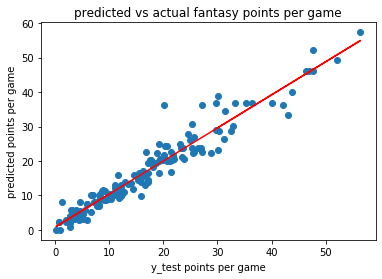

In [139]:
plt.scatter(y_test['NBA_FANTASY_PTS'],pts_prediction['NBA_FANTASY_PTS'])
plt.xlabel('y_test points per game')
plt.ylabel('predicted points per game')
plt.title('predicted vs actual fantasy points per game')

z = np.polyfit(y_test['NBA_FANTASY_PTS'], pts_prediction['NBA_FANTASY_PTS'], 1)
p = np.poly1d(z)
plt.plot(y_test['NBA_FANTASY_PTS'],p(y_test['NBA_FANTASY_PTS']),"r")

stats.pearsonr(y_test_array.flatten(),pts_prediction_array.flatten())[0]